In [1]:
import pandas as pd

# plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np

In [2]:
# read data
train = pd.read_csv("C:/Users/akabo/Downloads/Machine learning/final project/Project Data/Project Data/ProjectTrainingData.csv")
test = pd.read_csv("C:/Users/akabo/Downloads/Machine learning/final project/Project Data/Project Data/ProjectTestData.csv")


In [3]:
print(min(test.hour))
print(max(test.hour))

14102100
14103123


In [4]:
print(train.shape)
print(test.shape)

(31991090, 24)
(13015341, 23)


In [5]:
# take 100000 samples
sample = train.sample(100000, random_state = 613)

In [6]:
sample.click.value_counts()
# 0    82923
# 1    17077

0    82923
1    17077
Name: click, dtype: int64

In [7]:
sample.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
17585551,1.785264e+19,1,14102522,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,19015,300,250,2162,2,39,-1,33
30376165,7.856693e+18,0,14102911,1005,1,e023ba3e,75f9ddc3,f028772b,ecad2386,7801e8d9,...,1,0,23725,320,50,2716,3,43,-1,23
5286934,1.484242e+19,0,14102209,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,20632,320,50,2374,3,39,-1,23
29778677,1.629666e+19,0,14102908,1005,0,85f751fd,c4e18dd6,50e219e0,f888bf4c,5b9c592b,...,1,0,8330,320,50,761,3,175,100079,23
2385343,1.933015e+18,0,14102113,1005,1,57fe1b20,5b626596,f028772b,ecad2386,7801e8d9,...,1,0,9478,320,50,906,3,1451,100156,61


In [9]:
# get date of sample
sample['date'] = round((sample.hour - 14100000)/100).astype('int')
sample.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,date
17585551,1.785264e+19,1,14102522,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,0,19015,300,250,2162,2,39,-1,33,25
30376165,7.856693e+18,0,14102911,1005,1,e023ba3e,75f9ddc3,f028772b,ecad2386,7801e8d9,...,0,23725,320,50,2716,3,43,-1,23,29
5286934,1.484242e+19,0,14102209,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,0,20632,320,50,2374,3,39,-1,23,22
29778677,1.629666e+19,0,14102908,1005,0,85f751fd,c4e18dd6,50e219e0,f888bf4c,5b9c592b,...,0,8330,320,50,761,3,175,100079,23,29
2385343,1.933015e+18,0,14102113,1005,1,57fe1b20,5b626596,f028772b,ecad2386,7801e8d9,...,0,9478,320,50,906,3,1451,100156,61,21


In [10]:
# get hour of sample
sample.hour = sample.hour - 14100000 - sample.date * 100

sample.columns # can treat hour and date as continuous variables, but now let's just make it categorical

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date'],
      dtype='object')

In [14]:
for i in range(2, 25):
        sample.iloc[:, i] = sample.iloc[:, i].astype('category') # change to categorical variables
sample = sample.iloc[:, 1:]

IndexError: single positional indexer is out-of-bounds

In [16]:
sample.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,date
17585551,1,22,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,0,19015,300,250,2162,2,39,-1,33,25
30376165,0,11,1005,1,e023ba3e,75f9ddc3,f028772b,ecad2386,7801e8d9,07d7df22,...,0,23725,320,50,2716,3,43,-1,23,29
5286934,0,9,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,...,0,20632,320,50,2374,3,39,-1,23,22
29778677,0,8,1005,0,85f751fd,c4e18dd6,50e219e0,f888bf4c,5b9c592b,0f2161f8,...,0,8330,320,50,761,3,175,100079,23,29
2385343,0,13,1005,1,57fe1b20,5b626596,f028772b,ecad2386,7801e8d9,07d7df22,...,0,9478,320,50,906,3,1451,100156,61,21


In [17]:
for i in range(1, 24):
        print(i, len(sample.iloc[:, i].unique())) # get unique categories within each variable

1 24
2 7
3 7
4 1462
5 1334
6 18
7 1311
8 88
9 23
10 17022
11 77046
12 3140
13 4
14 4
15 1608
16 8
17 9
18 375
19 4
20 63
21 155
22 54
23 9


In [18]:
sample.columns[[10, 11]]

Index(['device_id', 'device_ip'], dtype='object')

In [19]:
sample.drop(['device_id', 'device_ip'], axis = 1, inplace = True) # so many categories, drop these two variables for now

In [87]:
# not sure need to be the same or not?
# for i in range(0,23):
#     X_test = X_test[X_test[X_test.columns[i]].isin(X_train.iloc[:,i])]

# len(X_test)
# y_test = y_test[X_test.index]

0 24
1 7
2 7
3 1055
4 918
5 17
6 923
7 68
8 21
9 6872
10 33454
11 2363
12 4
13 4
14 1347
15 8
16 9
17 361
18 4
19 62
20 147
21 54
22 9


In [20]:
# must convert the type of variables, the tree model will give no results otherwise
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in sample.columns:
    if sample[column_name].dtype != float:
        sample[column_name] = le.fit_transform(sample[column_name])
    else:
        pass

In [21]:
for i in sample.columns:
        sample[i] = sample[i].astype('category')

In [22]:
from sklearn.model_selection import train_test_split

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    sample.iloc[:, 1:], sample['click'], test_size = 0.4, random_state = 613, stratify = sample['click'])

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

random.seed(613)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [23]:
# predict 
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[27878  5291]
 [ 4940  1891]]
Normalized confusion matrix
[[0.84 0.16]
 [0.72 0.28]]


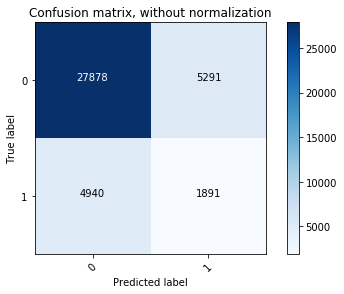

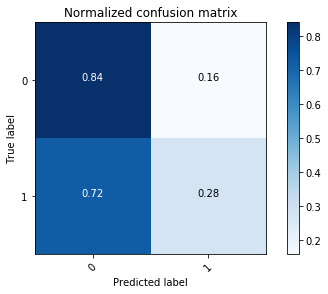

Accuracy (out-of-sample): 0.74
F1 score (out-of-sample):  0.5574232760497014
Kappa score (out-of-sample):  0.11496447154585687
             precision    recall  f1-score   support

          0       0.85      0.84      0.84     33169
          1       0.26      0.28      0.27      6831

avg / total       0.75      0.74      0.75     40000

0.11501750300117948


In [24]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['0', '1']))

print(sklearn.metrics.matthews_corrcoef(y_test, y_pred))